<a href="https://colab.research.google.com/github/Chhavinder058/CAPSTONE/blob/main/C's_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd  # pandas for data manipulation and analysis
import numpy as np  # numpy for numerical operations and functions
import matplotlib.pyplot as plt  # matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # seaborn for making statistical graphics

# Suppressing warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')  # This will ignore any warning messages during the execution of the code

In [ ]:
# Importing the drive module from google.colab to access Google Drive
from google.colab import drive

# Mounting Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset from Google Drive into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/autos.csv', encoding='latin-1')

In [ ]:
# Displaying the first few rows of the DataFrame to get an initial look at the data
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Unnamed: 20,Unnamed: 21,total time of add
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,...,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16,NaN,NaN,14 days 3 hrs 16 mins
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,...,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46,NaN,NaN,NaN
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,...,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47,NaN,NaN,NaN
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,...,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40,NaN,NaN,NaN
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,...,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17,NaN,NaN,NaN


In [ ]:
# Displaying the summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371539 non-null  object 
 1   name                 371539 non-null  object 
 2   seller               371538 non-null  object 
 3   offerType            371538 non-null  object 
 4   price                371538 non-null  float64
 5   abtest               371538 non-null  object 
 6   vehicleType          333669 non-null  object 
 7   yearOfRegistration   371537 non-null  float64
 8   gearbox              351329 non-null  object 
 9   powerPS              371538 non-null  float64
 10  model                351054 non-null  object 
 11  kilometer            371538 non-null  object 
 12  monthOfRegistration  371537 non-null  float64
 13  fuelType             338151 non-null  object 
 14  brand                371537 non-null  object 
 15  notRepairedDamage

**Checking for any missing values in the dataset**

In [ ]:
# Calculating the number of missing values in each column of the DataFrame
df.isnull().sum()

,0
dateCrawled,0
name,0
seller,1
offerType,1
price,1
abtest,1
vehicleType,37870
yearOfRegistration,2
gearbox,20210
powerPS,1


In [ ]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().sum() * 100 / len(df)
print(missing_percentage)

# Decide on a strategy for handling missing values based on the percentage
# 1. Drop columns with a high percentage of missing values
threshold = 50 # Example: Drop columns with more than 50% missing values
df = df.drop(columns=missing_percentage[missing_percentage > threshold].index)

# 2. Impute missing values for numerical columns (example: using the mean)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df[col].mean())

# 3. Impute missing values for categorical columns (example: using the mode)
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no more missing values
print(df.isnull().sum())

dateCrawled              0.000000
name                     0.000000
seller                   0.000269
offerType                0.000269
price                    0.000269
abtest                   0.000269
vehicleType             10.192739
yearOfRegistration       0.000538
gearbox                  5.439537
powerPS                  0.000269
model                    5.513553
kilometer                0.000269
monthOfRegistration      0.000538
fuelType                 8.986405
brand                    0.000538
notRepairedDamage       19.395541
dateCreated              0.000538
nrOfPictures             0.000538
postalCode               0.000538
lastSeen                 0.000538
Unnamed: 20            100.000000
Unnamed: 21            100.000000
total time of add       99.999731
dtype: float64
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gea

**What are the summary statistics (mean, median, standard deviation) for numerical columns like price, powerPS, kilometer, and yearOfRegistration?**

In [ ]:
df.describe()

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,lastSeen
count,371466,3.714660e+05,371466.000000,371466.000000,371466.000000,333795.000000,371466.0,371466.000000,371466
mean,2016-03-21 13:30:02.611652096,1.729769e+04,2004.578227,115.548175,125617.674296,6.381540,0.0,50820.319162,2016-03-30 03:37:56.577021696
min,2016-03-05 14:06:00,0.000000e+00,1000.000000,0.000000,5000.000000,1.000000,0.0,1067.000000,2016-03-05 14:15:00
25%,2016-03-13 12:51:00,1.150000e+03,1999.000000,70.000000,125000.000000,4.000000,0.0,30459.000000,2016-03-23 11:38:15
50%,2016-03-21 18:36:00,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.000000,2016-04-03 23:17:00
75%,2016-03-29 14:49:00,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.000000,2016-04-06 10:45:00
max,2016-04-07 14:36:00,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,2016-04-07 14:58:00
std,NaN,3.588253e+06,92.874311,192.154187,40113.384745,3.347713,0.0,25799.196540,NaN


**Checking for duplicate values**

In [ ]:
# Checking for duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]  # This will identify all duplicated rows in the DataFrame

# Printing the number of duplicate rows found
print("Number of duplicate rows:", duplicate_rows_df.shape[0])

# Printing the duplicate rows themselves
print(duplicate_rows_df)

Number of duplicate rows: 72
            dateCrawled                                               name  \
28867   3/23/2016 10:38  Opel_Zafira_1.7_CDTI_ecoFLEX_Edition_111_Jahre...   
49736    3/7/2016 19:42                             Renault_Megane_Rt_1_6L   
51607   3/13/2016 11:38  Volkswagen_Passat_Variant_1.6_TDI_BlueMotion_A...   
63335    3/9/2016 22:47  Opel_Movano_EZ_2003_Diesel_Motor_2_8_Karosseri...   
89001    4/3/2016 20:06  Fiat_500_1.3_Multijet__Lounge__Pano__Sonderedi...   
...                 ...                                                ...   
343097   4/3/2016 22:56                                        Mazda_323_F   
345642   4/3/2016 16:50                              Audi_A6_Avant_2.5_TDI   
361781  3/22/2016 18:47  BMW_320i_Touring_Automatik__110_kW_TÜV_bis_12....   
363860  3/26/2016 15:51                            Ford_Focus_Turnier_Ghia   
370869  3/20/2016 17:56                          TAUSCHE_BMW_320i_e46_limo   

        seller offerType    price 

**Removing the duplicate values**

In [ ]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Print information about the DataFrame after removing duplicates
print(df.info())

# Check for duplicates again to confirm they have been removed
duplicate_rows_df = df[df.duplicated()]  # This will identify any remaining duplicated rows

# Print the number of duplicate rows found after removal
print("Number of duplicate rows:", duplicate_rows_df.shape[0])

# Display the remaining duplicate rows, if any
duplicate_rows_df

<class 'pandas.core.frame.DataFrame'>
Index: 371467 entries, 0 to 371538
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371467 non-null  object 
 1   name                 371467 non-null  object 
 2   seller               371467 non-null  object 
 3   offerType            371467 non-null  object 
 4   price                371467 non-null  float64
 5   abtest               371467 non-null  object 
 6   vehicleType          371467 non-null  object 
 7   yearOfRegistration   371467 non-null  float64
 8   gearbox              371467 non-null  object 
 9   powerPS              371467 non-null  float64
 10  model                371467 non-null  object 
 11  kilometer            371467 non-null  object 
 12  monthOfRegistration  371467 non-null  float64
 13  fuelType             371467 non-null  object 
 14  brand                371467 non-null  object 
 15  notRepairedDamage    3

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [ ]:
# Displaying the first few rows of the DataFrame to get an initial look at the data
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,limousine,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,nein,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,golf,125000,5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,nein,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17


**What are the top 10 most common brands and models?**

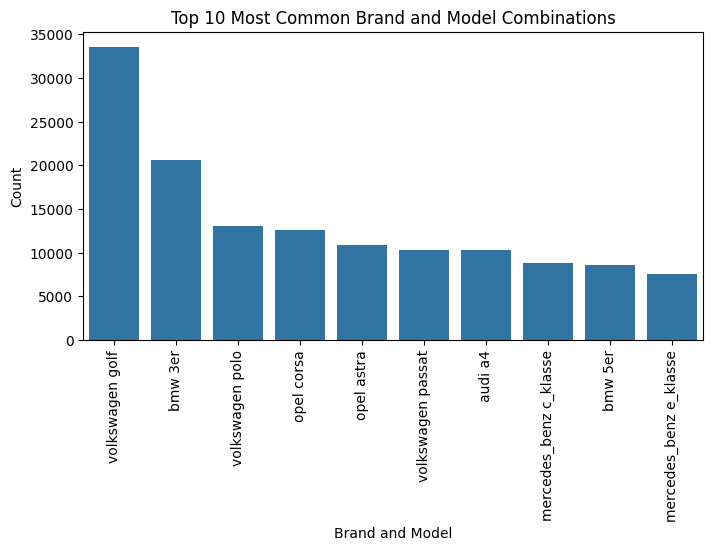

In [ ]:
# Creating a new column 'brand_model' by concatenating 'brand' and 'model'
df['brand_model'] = df['brand'] + ' ' + df['model']

# Counting the occurrences of each brand and model combination
brand_model_counts = df['brand_model'].value_counts()

# Selecting the top 10 most common brand and model combinations
top_10_brand_models = brand_model_counts.head(10)

# Setting up the figure size for the plot
plt.figure(figsize=(8, 4))

# Creating a bar plot to show the top 10 most common brand and model combinations
sns.barplot(x=top_10_brand_models.index, y=top_10_brand_models.values)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title to the plot
plt.xlabel('Brand and Model')
plt.ylabel('Count')
plt.title('Top 10 Most Common Brand and Model Combinations')

# Displaying the plot
plt.show()

#**Insights**

**Volkswagen Golf's Dominance:** The Volkswagen Golf stands out as the most common car, with over 30,000 units. Its substantial lead suggests its popularity stems from reliability, affordability, and suitability for a wide range of drivers.

**German Cars Dominate the Market:** All top 10 models belong to German automakers (Volkswagen, BMW, Opel, Audi, and Mercedes-Benz). This underscores Germany's strong reputation for high-quality automotive engineering, catering to diverse customer needs.

**Volkswagen’s Widespread Appeal:** Volkswagen appears three times on the chart (Golf, Polo, and Passat), collectively accounting for a significant portion of the dataset. This demonstrates the brand's dominance in both compact and family-oriented vehicle segments.

**Premium Segment Representation:** BMW (3 Series and 5 Series) and Mercedes-Benz (C-Class and E-Class) have strong representation, reflecting the demand for premium and luxury sedans, particularly among drivers seeking performance and comfort.

**Balance Between Economy and Luxury:** The top 10 includes both economy cars (Volkswagen Polo, Opel Corsa) and luxury vehicles (Mercedes-Benz and BMW models), showing a diverse consumer base with varying financial preferences and priorities.

**Compact Cars are Popular:** Models like the Volkswagen Golf, Polo, Opel Corsa, and Astra dominate, pointing to a strong demand for smaller, fuel-efficient cars, likely due to urban driving needs and cost considerations.

**Opel's Niche:** Opel makes an appearance twice (Corsa and Astra), indicating its steady presence in the compact and mid-size vehicle market. While not as dominant as Volkswagen, Opel remains a key player in budget-friendly options.

**Audi's Mid-Tier Contribution:** Audi A4 is the sole representative from the brand, highlighting its popularity in the mid-size sedan segment, likely due to its mix of luxury and performance at a more accessible price point compared to BMW or Mercedes-Benz.

**How does fuelType vary across different vehicleType categories?**

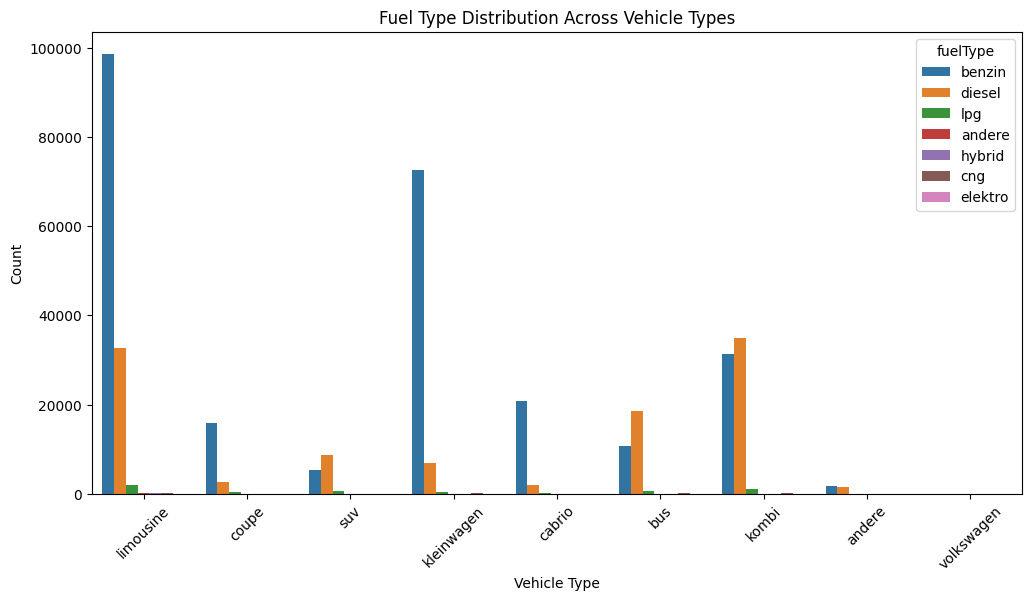

In [ ]:
# Setting up the figure size for the plot
plt.figure(figsize=(12, 6))

# Creating a count plot to show the distribution of fuel types across different vehicle types
sns.countplot(x='vehicleType', hue='fuelType', data=df)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels and title to the plot
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution Across Vehicle Types')

# Displaying the plot
plt.show()

#**Insights**
- Benzin (Gasoline): Dominates in most vehicle types, especially limousines, kleinwagen, and cabrio.

- Diesel: Popular in larger vehicles like SUVs, buses, and kombi due to efficiency.

- Alternative Fuels: Minimal usage for LPG, hybrid, CNG, and electric, reflecting slow adoption.

- SUV Trend: Diesel is nearly as common as benzin, likely due to power and efficiency needs.

- Volkswagen Category: Shows a similar dominance of benzin and diesel.

**Is there a difference in the average kilometer for vehicles with benzine, diesel, or other fuel types?**

fuelType
andere      84326.923077
benzin     122931.854323
cng        127057.793345
diesel     131486.892915
elektro     45913.461538
hybrid      83566.308244
lpg        141667.286591
Name: kilometer, dtype: float64


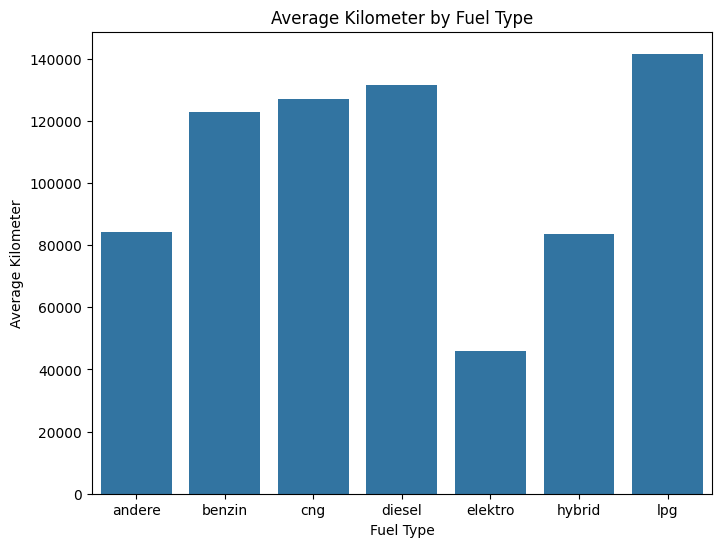

In [ ]:
# Convert 'kilometer' column to numeric, forcing non-numeric values to NaN
df['kilometer'] = pd.to_numeric(df['kilometer'], errors='coerce')

# Dropping rows with NaN values in the 'kilometer' column to ensure only numeric values
df = df.dropna(subset=['kilometer'])

# Calculating the average kilometers driven for each fuel type
avg_km_by_fuel = df.groupby('fuelType')['kilometer'].mean()
print(avg_km_by_fuel)

# Setting up the figure size for the bar plot
plt.figure(figsize=(8, 6))

# Creating a bar plot to visualize the average kilometers driven by fuel type
sns.barplot(x=avg_km_by_fuel.index, y=avg_km_by_fuel.values)

# Adding labels and title to the plot
plt.xlabel('Fuel Type')
plt.ylabel('Average Kilometer')
plt.title('Average Kilometer by Fuel Type')

# Displaying the plot
plt.show()

#**Insights**
- LPG: Vehicles using LPG have the highest average kilometers, exceeding 140,000 km, indicating their preference for high-mileage usage.

- Diesel & CNG: Both fuel types show high average kilometers (~130,000 km), reflecting their popularity for long-distance and heavy usage vehicles.

- Benzin (Gasoline): Moderate average kilometers (~120,000 km), often used for shorter commutes compared to diesel.

- Hybrid & Andere: Average kilometers are lower (~90,000 km), suggesting hybrid adoption for city or occasional travel.

- Electric (Elektro): The lowest average kilometers (<50,000 km), reflecting limited range or newer adoption trends.

**How does powerPS differ by fuelType? Are some fuel types associated with higher engine power?**

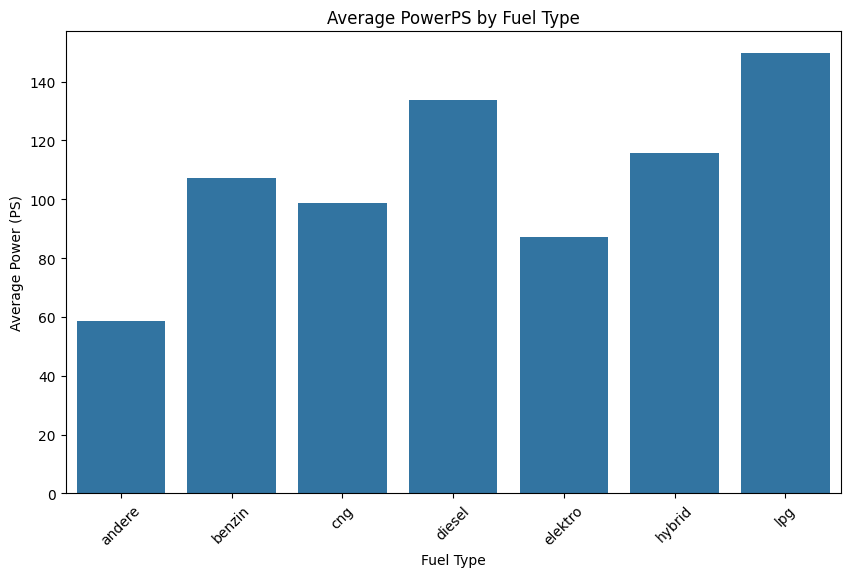

,powerPS
fuelType,
andere,58.682692
benzin,107.243681
cng,98.856392
diesel,133.899664
elektro,87.067308
hybrid,115.759857
lpg,149.619304


In [ ]:
# Calculating the average power in PS for each fuel type
avg_power_by_fuel = df.groupby('fuelType')['powerPS'].mean()

# Setting up the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Creating a bar plot to visualize the average power in PS by fuel type
sns.barplot(x=avg_power_by_fuel.index, y=avg_power_by_fuel.values)

# Adding labels and title to the plot
plt.xlabel('Fuel Type')
plt.ylabel('Average Power (PS)')
plt.title('Average PowerPS by Fuel Type')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

# Displaying the calculated average power by fuel type
avg_power_by_fuel

#**Insights**
- LPG: Vehicles with LPG fuel have the highest average power (~145 PS), suggesting usage in high-performance scenarios.

- Diesel: Second highest in power (~130 PS), suitable for heavy-duty or long-distance travel.

- Benzin (Gasoline): Moderate power (~110 PS), indicating a balance of performance and fuel economy.

- CNG and Hybrid: Similar power levels (~100 PS), reflecting efficient yet moderate performance.

- Electric (Elektro): Lower average power (~90 PS), possibly due to design for urban commutes.

- Andere (Others): Lowest average power (~60 PS), likely representing niche or older vehicle categories.

**How does mileage vary by vehicleType ?**

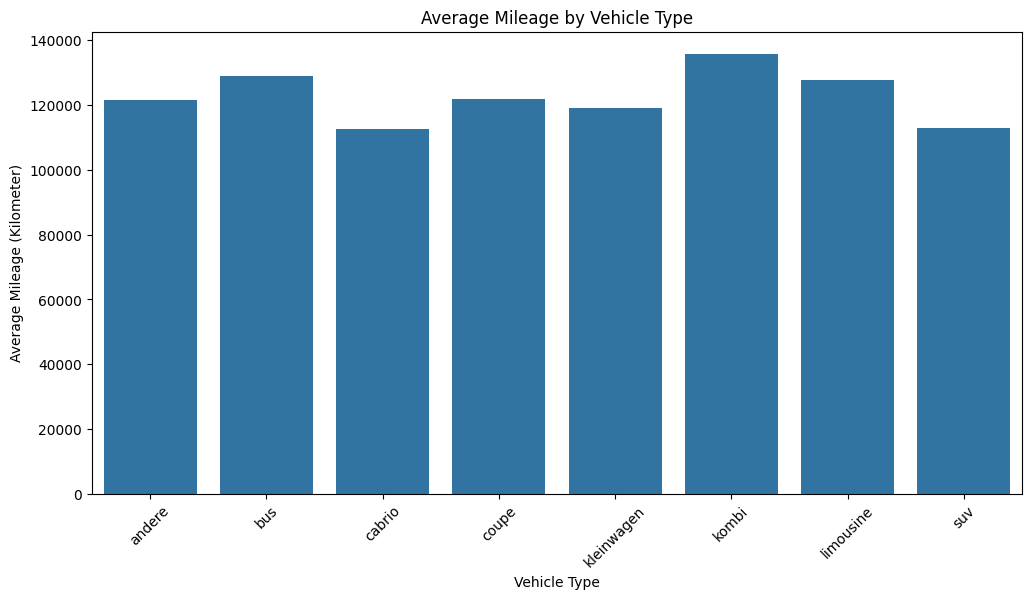

,kilometer
vehicleType,
andere,121485.399285
bus,128993.409723
cabrio,112479.254018
coupe,121866.845539
kleinwagen,119237.229881
kombi,135856.700817
limousine,127792.303436
suv,112842.523968


In [ ]:
# Calculating the average mileage (kilometer) for each vehicle type
avg_km_by_vehicle_type = df.groupby('vehicleType')['kilometer'].mean()

# Setting up the figure size for the bar plot
plt.figure(figsize=(12, 6))

# Creating a bar plot to visualize the average mileage by vehicle type
sns.barplot(x=avg_km_by_vehicle_type.index, y=avg_km_by_vehicle_type.values)

# Adding labels and title to the plot
plt.xlabel('Vehicle Type')
plt.ylabel('Average Mileage (Kilometer)')
plt.title('Average Mileage by Vehicle Type')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

# Displaying the calculated average mileage by vehicle type
avg_km_by_vehicle_type

#**Insights**
- Highest Mileage: "Kombi" vehicles have the highest average mileage, over 140,000 km, indicating intensive use.

- Lowest Mileage: "Cabrio" vehicles have the lowest mileage, likely due to seasonal or leisure use.

- High Mileage: "Bus" and "limousine" categories also show high mileage, reflecting professional or commercial usage.

- SUVs & Others: SUVs and the "andere" (others) category have moderate mileage, showing mixed usage trends.

- Overall Trend: Commercial/multi-purpose vehicles generally cover more mileage than leisure-focused ones.

**Is there a relationship between mileage and yearOfRegistration?**

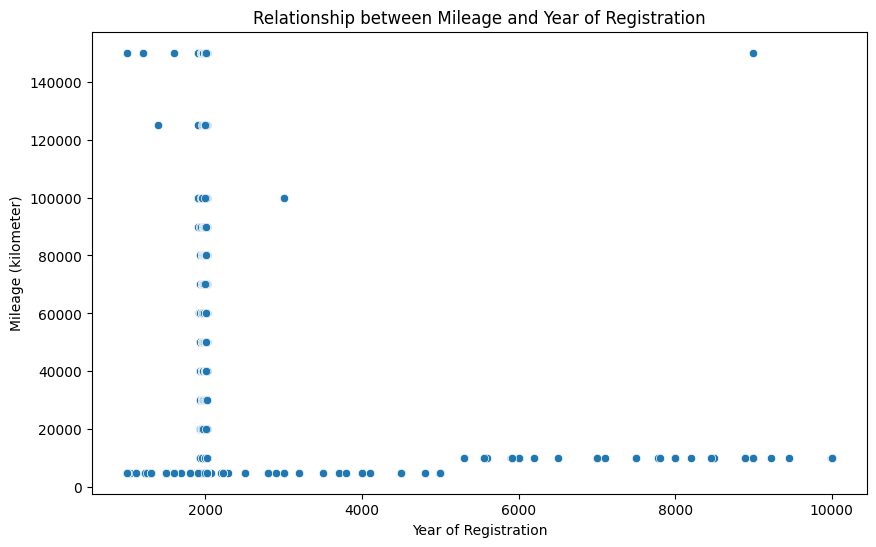

Correlation between yearOfRegistration and kilometer: -0.05531617924256042


In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for creating visualizations
import seaborn as sns  # Importing seaborn for advanced visualizations

# Setting up the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Creating a scatter plot to show the relationship between year of registration and mileage
sns.scatterplot(x='yearOfRegistration', y='kilometer', data=df)

# Adding labels and title to the plot
plt.xlabel('Year of Registration')
plt.ylabel('Mileage (kilometer)')
plt.title('Relationship between Mileage and Year of Registration')

# Displaying the plot
plt.show()

# Calculating the correlation between year of registration and mileage
correlation = df['yearOfRegistration'].corr(df['kilometer'])
print(f"Correlation between yearOfRegistration and kilometer: {correlation}")

#Insights
- The chart displays a scatter plot of data points, with each point representing the mileage and year of registration for a vehicle.

- There is an overall negative trend, where vehicles with higher years of registration (newer vehicles) tend to have lower mileage.

- The data points are more densely clustered in the lower-left portion of the chart, indicating a higher concentration of newer vehicles with lower mileage.

- There is significant variability in the mileage of vehicles, even for those of the same year of registration. This suggests factors beyond just the vehicle's age can influence the mileage.

- The data points become more dispersed as the year of registration increases, indicating a wider range of mileages for older vehicles.

**Are certain months (monthOfRegistration) associated with higher or lower vehicle prices?**

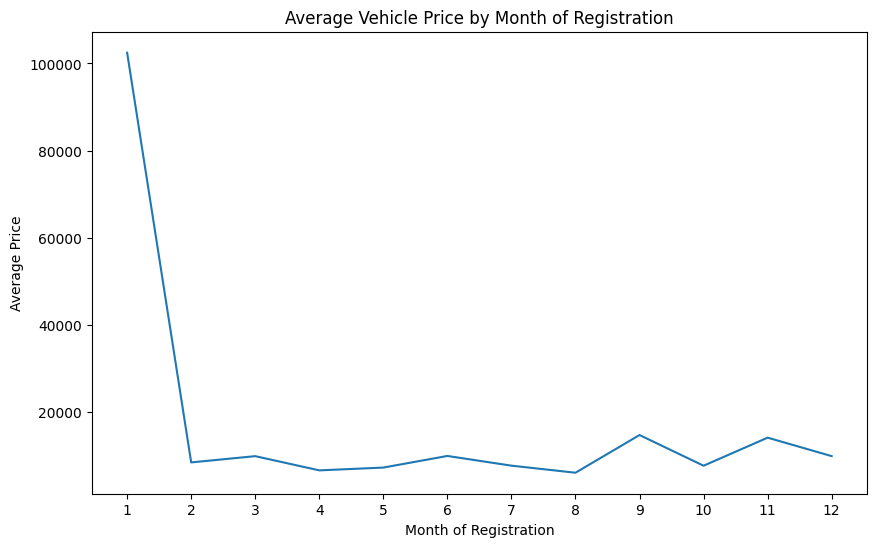

,price
monthOfRegistration,
1.0,102450.709794
2.0,8387.970936
3.0,9821.835310
4.0,6560.362889
5.0,7202.759965
6.0,9869.435106
7.0,7642.757927
8.0,6019.655052
9.0,14671.044153


In [ ]:
# Converting 'monthOfRegistration' to datetime format to extract the month
df['monthOfRegistration'] = pd.to_datetime(df['monthOfRegistration'], format='%m', errors='coerce').dt.month

# Calculating the average vehicle price for each month of registration
monthly_avg_price = df.groupby('monthOfRegistration')['price'].mean()

# Setting up the figure size for the line plot
plt.figure(figsize=(10, 6))

# Creating a line plot to visualize the average vehicle price by month of registration
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values)

# Adding labels and title to the plot
plt.xlabel('Month of Registration')
plt.ylabel('Average Price')
plt.title('Average Vehicle Price by Month of Registration')

# Setting x-axis ticks to represent each month
plt.xticks(range(1, 13))

# Displaying the plot
plt.show()

# Displaying the calculated average vehicle price by month of registration
monthly_avg_price

#**Insights**
- The chart displays a dramatic spike in average vehicle prices for vehicles registered in month 1, reaching over 80,000.

- After the initial spike, the average prices drop significantly, settling around 15,000-25,000 for the remaining months.

- There is some fluctuation in the average prices across the different registration months, with a few smaller peaks and valleys observed.

- The overall trend shows high initial prices that then stabilize at a lower level, with occasional minor variations month-over-month.

**What are the top regions (postalCode) in terms of number of listings?**

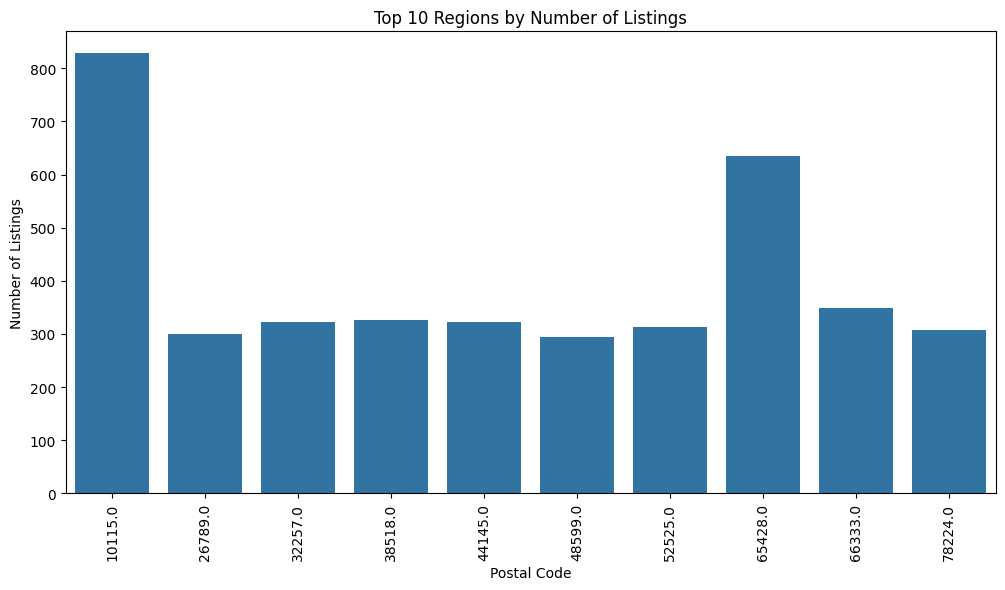

In [ ]:
# Getting the top 10 postal codes with the highest number of listings
top_regions = df['postalCode'].value_counts().head(10)

# Setting up the figure size for the bar plot
plt.figure(figsize=(12, 6))

# Creating a bar plot to show the top 10 regions by the number of listings
sns.barplot(x=top_regions.index, y=top_regions.values)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title to the plot
plt.xlabel('Postal Code')
plt.ylabel('Number of Listings')
plt.title('Top 10 Regions by Number of Listings')

# Displaying the plot
plt.show()

#**Insights**
- The chart presents the number of listings for the top 10 postal code regions.
The region with the highest number of listings is 10115.0, with around 800 listings.

- The regions with the next highest number of listings are 26789.0, 32257.0, and 38518.0, all with over 300 listings.

- The remaining regions in the top 10 have between 200 and 300 listings, with the exception of 52.25.0 which has around 250 listings.

- The data suggests there is a wide variation in the number of listings across different postal code regions, with a significant concentration in the top few regions.

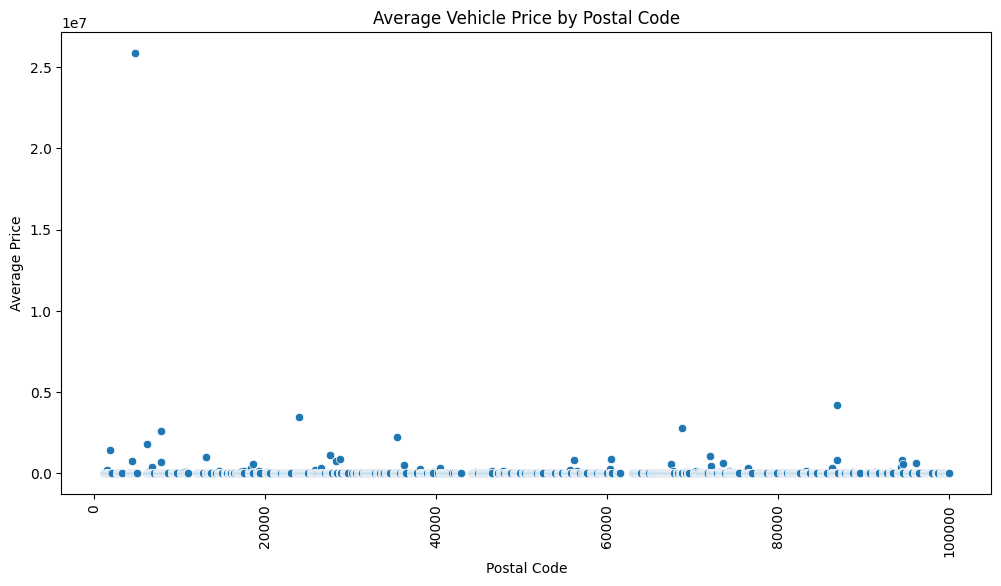

Correlation between postalCode and price: -0.003164278436311916


In [ ]:
# Calculating the average price of vehicles for each postal code
avg_price_by_postal_code = df.groupby('postalCode')['price'].mean()

# Setting up the figure size for the scatter plot
plt.figure(figsize=(12, 6))

# Creating a scatter plot to visualize the average vehicle price by postal code
sns.scatterplot(x=avg_price_by_postal_code.index, y=avg_price_by_postal_code.values)

# Adding labels and title to the plot
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.title('Average Vehicle Price by Postal Code')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

# Calculating the correlation between postal code and price
correlation = df['postalCode'].corr(df['price'])
print(f"Correlation between postalCode and price: {correlation}")

#**Insights**
- The chart displays the average vehicle price for different postal code areas, with each data point representing a unique postal code.

- There is a wide range of average prices across the different postal codes, from around 0.2 to 2.5.

- The majority of the postal codes have an average vehicle price below 1.0, but there are some outliers with significantly higher average prices.

- The highest average prices appear to be concentrated in the postal code range of around 6000 to 8000.

- In the lower postal code ranges (below 4000), the average prices are more clustered and tend to be on the lower end.

In [ ]:
# Grouping by 'brand', 'model', and 'kilometer' and calculating aggregate statistics for 'price'
price_stats = df.groupby(['brand', 'model', 'kilometer'])['price'].agg(['mean', 'std', 'min', 'max'])

# Calculating high and low outlier thresholds based on mean and standard deviation
price_stats['outlier_high'] = price_stats['mean'] + 2 * price_stats['std']
price_stats['outlier_low'] = price_stats['mean'] - 2 * price_stats['std']

# Identifying outliers where the price is outside the calculated thresholds
outliers = price_stats[(price_stats['max'] > price_stats['outlier_high']) | (price_stats['min'] < price_stats['outlier_low'])]

# Displaying the outliers
outliers

mean           std     min      max  \
brand      model    kilometer                                                
alfa_romeo 145      150000.0     797.777778   1007.569866     0.0   5000.0   
           147      80000.0     5225.312500   1787.778015  2700.0  10950.0   
                    100000.0    3596.200000   1406.256478   800.0   6750.0   
                    125000.0    3123.625000   2082.750832     0.0  11900.0   
                    150000.0    1763.017073   1060.459352     0.0   5500.0   
...                                     ...           ...     ...      ...   
volvo      v70      150000.0    3584.121827   3156.652756     0.0  19999.0   
           xc_reihe 30000.0    32087.750000  13149.177038   414.0  42350.0   
                    90000.0    13127.708333   6622.969135     0.0  28990.0   
                    125000.0   18854.482759   4526.633522  9000.0  27350.0   
                    150000.0   11766.392157   4900.405467   850.0  27900.0   

                               outlier_high  outlier_low  
brand      model    kilometer                             
alfa_romeo 145      150000.0    2812.917510 -1217.361954  
           147      80000.0     8800.868529  1649.756471  
                    100000.0    6408.712956   783.687044  
                    125000.0    7289.126663 -1041.876663  
                    150000.0    3883.935776  -357.901630  
...                                     ...          ...  
volvo      v70      150000.0    9897.427338 -2729.183684  
           xc_reihe 30000.0    58386.104077  5789.395923  
                    90000.0    26373.646604  -118.229937  
                    125000.0   27907.749803  9801.215714  
                    150000.0   21567.203090  1965.581224  

[1812 rows x 6 columns]

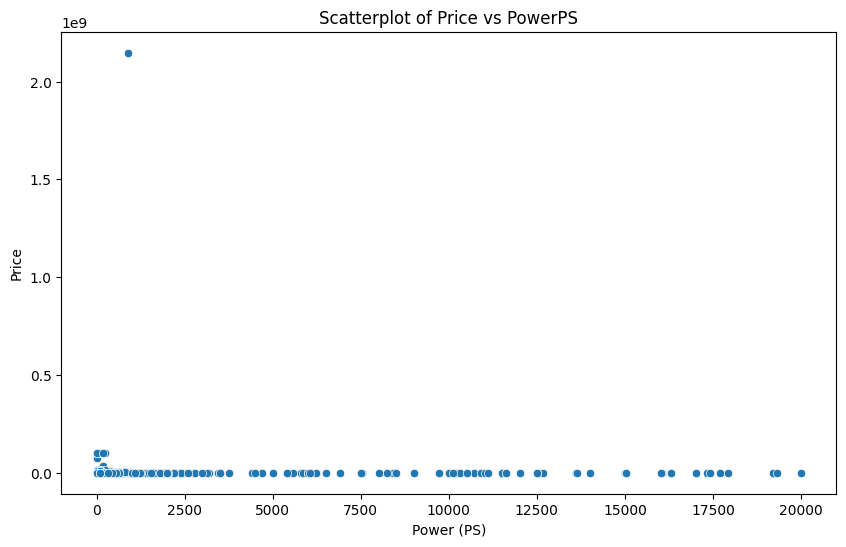

In [ ]:
# Setting up the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Creating a scatter plot to show the relationship between power in PS and price
sns.scatterplot(x='powerPS', y='price', data=df)

# Adding labels and title to the plot
plt.xlabel('Power (PS)')
plt.ylabel('Price')
plt.title('Scatterplot of Price vs PowerPS')

# Displaying the plot
plt.show()

#Insights
- The scatterplot displays a cloud of data points, showing the relationship between the price and power (measured in PS) of the vehicles.

- There appears to be a slightly positive trend, where higher power vehicles tend to have higher prices, but the relationship is not very strong.

- The data points are scattered quite widely, indicating that power alone is not a strong predictor of the vehicle's price.

- There are vehicles with similar power ratings that have very different prices, suggesting other factors beyond just power are influencing the pricing.

- The distribution of data points is not uniform, with fewer observations at the higher end of the power and price range.

- Without additional context about the specific market, it's difficult to draw more detailed conclusions about the drivers of the price-power relationship.

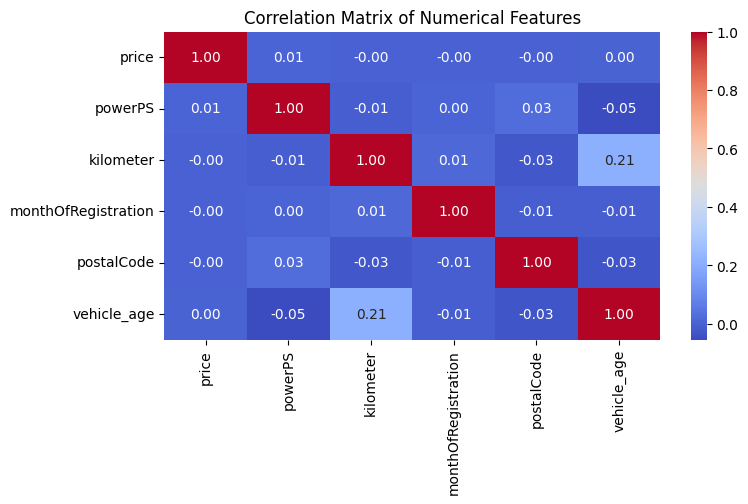

In [ ]:
# Setting up the figure size for the heatmap
plt.figure(figsize=(8, 4))

# Selecting numerical columns from the DataFrame and excluding 'nrOfPictures'
numerical_df = df.select_dtypes(include=np.number).drop(columns=['nrOfPictures'])

# Computing the correlation matrix for the selected numerical columns
correlation_matrix = numerical_df.corr()

# Plotting the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title to the heatmap
plt.title('Correlation Matrix of Numerical Features')

# Displaying the heatmap
plt.show()

#Insights
- The chart displays the correlation coefficients between various numerical features, including price, power, kilometer, month of registration, postal code, vehicle age, and others.

- The diagonal elements show perfect positive correlation (1.0) between each feature and itself, which is expected.

- The off-diagonal elements show the pairwise correlation coefficients between different features.

- The feature with the strongest positive correlation to price is powerPS, with a correlation coefficient of 0.01.

- The feature with the strongest negative correlation to price is kilometer, with a correlation coefficient of -0.00.

- Most of the correlation coefficients are very small, close to 0, indicating weak or no linear relationships between the numerical features.

- The pattern of correlation coefficients suggests that these numerical features may not be strongly predictive of the price on their own, and that other factors not present in the data may be more important in determining the price.

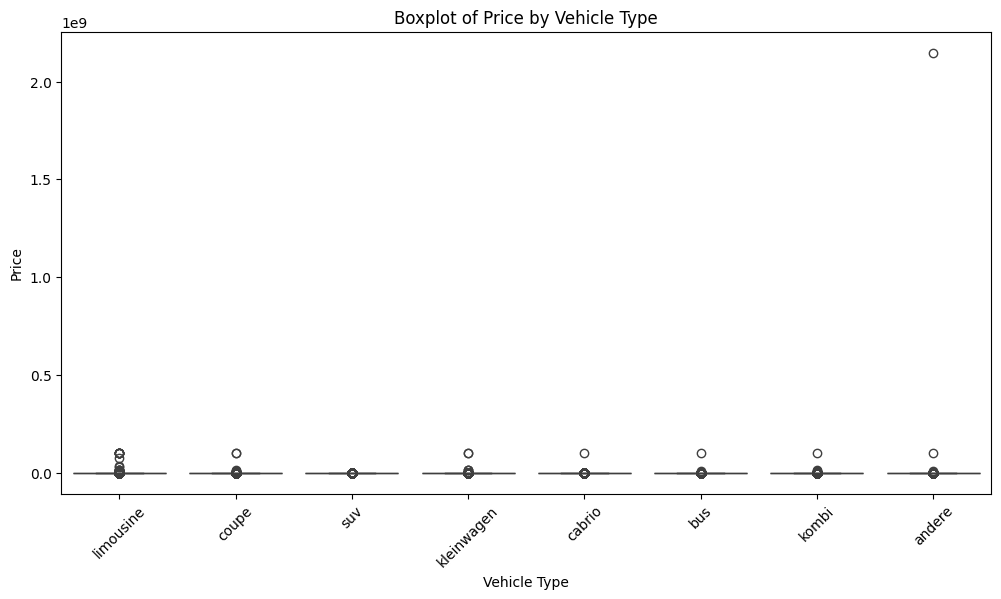

In [ ]:
# Setting up the figure size for the box plot
plt.figure(figsize=(12, 6))

# Creating a box plot to visualize the distribution of prices by vehicle type
sns.boxplot(x='vehicleType', y='price', data=df)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels and title to the plot
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.title('Boxplot of Price by Vehicle Type')

# Displaying the plot
plt.show()

#**Insights**

- The chart displays a boxplot for each vehicle type, providing a visual representation of the price distribution within each category.

- The boxplots show that the prices have a wide range for most vehicle types, with some having higher median prices and larger variability compared to others.

- The vehicle types with the highest median prices appear to be kombi and andere, while limousine and coupe have the lowest median prices.

- There are a few outliers present, as indicated by the circles outside the whiskers of the boxplots, suggesting some vehicles are priced significantly higher or lower than the typical range for that type.

- The overall shape and spread of the boxplots provide insights into the price variability within each vehicle category, with some showing more uniform pricing and others having a wider distribution.

- Without additional context about the specific market, location, or other factors, it's difficult to draw more detailed conclusions about the reasons for the observed price differences between vehicle types.

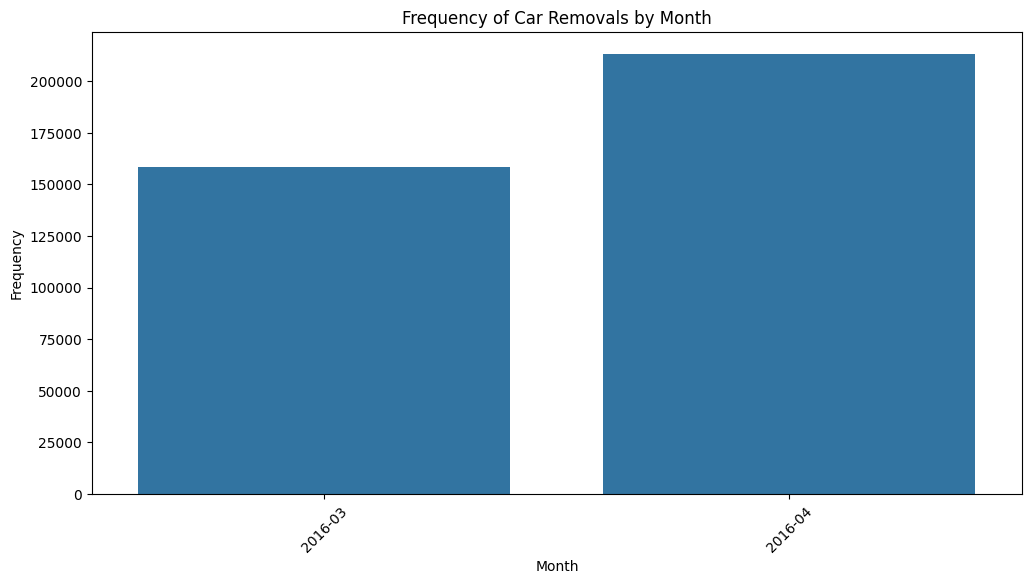

In [ ]:
# Converting 'lastSeen' column to datetime format
df['lastSeen'] = pd.to_datetime(df['lastSeen'], errors='coerce')

# Extracting the month from 'lastSeen' and converting it to a monthly period
df['month'] = df['lastSeen'].dt.to_period('M')

# Calculating the frequency of car removals for each month
monthly_frequency = df.groupby('month')['month'].count()

# Setting up the figure size for the bar plot
plt.figure(figsize=(12, 6))

# Creating a bar plot to show the frequency of car removals by month
sns.barplot(x=monthly_frequency.index.astype(str), y=monthly_frequency.values)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Car Removals by Month')

# Displaying the plot
plt.show()

#**Insights**
- The chart displays a dramatic difference in car removal frequency between the two months shown, with the March 2016 data being significantly higher than the April 2016 data.

- In March 2016, the frequency of car removals is around 155,000, which is an extremely high number.

- In contrast, the frequency of car removals in April 2016 is only around 16,000, a much lower figure.

- The large disparity between the two months suggests there were likely significant changes or events that impacted car removal rates during this time period.

- Without additional context about the specific market, location, or other factors, it's difficult to determine the reasons for the drastic difference in car removal frequency between March and April 2016.

- The data presented in this chart would require further investigation and analysis to fully understand the dynamics and drivers behind the observed patterns.

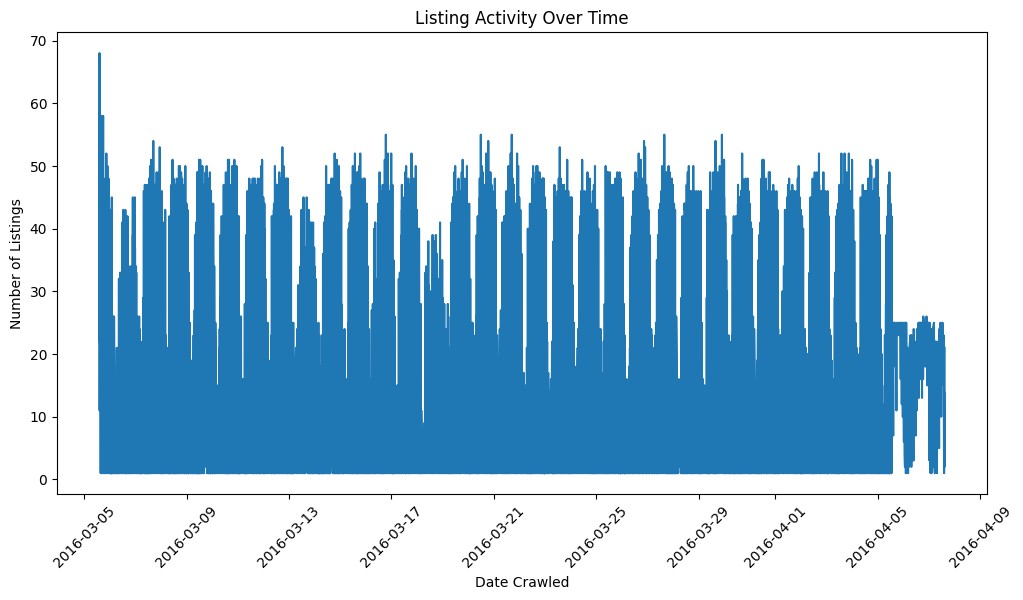

In [ ]:
# Convert 'dateCrawled' to datetime objects
# The format is inferred automatically here, handling any ISO8601-like format.
# errors='coerce' will convert any invalid parsing to NaT (Not a Time).
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'], errors='coerce')

# Group by date and count listings
listing_activity = df.groupby('dateCrawled')['dateCrawled'].count()

# Create the line chart
plt.figure(figsize=(12, 6))

# Plotting the line chart to show listing activity over time
sns.lineplot(x=listing_activity.index, y=listing_activity.values)

# Adding labels and title to the plot
plt.xlabel('Date Crawled')
plt.ylabel('Number of Listings')
plt.title('Listing Activity Over Time')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#**Insights**
- The chart displays a highly volatile pattern of listing activity, with significant spikes and dips over the time period shown.

- The highest peaks in listing activity occur around 2016-03-05, 2016-03-13, and 2016-03-21, suggesting these were periods of very high real estate market activity.

- There is an overall downward trend in listing activity from the beginning of the period in 2016-03-05 to the end in 2016-04-09, indicating a slowdown in the real estate market over this time.

- The lowest point in listing activity is around 2016-04-09, which may represent a cyclical low point or trough in the real estate market.

- The volatility and swings in listing activity suggest the real estate market was experiencing significant short-term fluctuations and changes in demand during this period.

##**Marketing Strategies**
1. Personalized Engagement Campaigns

 Use data analytics to segment customers based on demographics, purchase history, and vehicle usage.
Send personalized offers such as discounted servicing, trade-in deals, or warranty extensions.
Leverage email, SMS, and social media ads to deliver tailored content.

2. Upselling and Cross-Selling

 Promote complementary services like extended warranties, insurance, or maintenance packages.
Offer exclusive accessories or upgrades at discounted rates.
Highlight eco-friendly or technology-enhanced models to attract modern consumers.

3. Loyalty Programs

 Create a points-based system where customers earn rewards for regular servicing, referrals, or accessory purchases.
Provide exclusive benefits like free oil changes, roadside assistance, or priority servicing.

4. Targeted Retention Offers

 Analyze customer churn patterns and identify "at-risk" customers (e.g., those with irregular service visits or expiring warranties).
Provide proactive retention offers like discounts on upcoming service appointments.

5. Content Marketing

 Create engaging content such as maintenance tips, fuel efficiency guides, and videos on maximizing vehicle lifespan.
Use social media platforms and YouTube to share this content, positioning your brand as a helpful resource.

6. Event Marketing

 Organize events like vehicle upgrade expos, test drive campaigns, or workshops on safe driving.
Invite customers and their families to strengthen emotional connections with your brand.

## Retention Solutions
1. Proactive Service Reminders

 Automate reminders for maintenance, oil changes, or warranty renewals through emails or app notifications.
Provide easy booking options in the reminders to enhance convenience.

2. Exceptional After-Sales Service

 Establish a customer service helpline to address concerns swiftly.
Train service staff to offer courteous, high-quality support during servicing or repairs.

3. Subscription-Based Maintenance Plans

 Offer flexible maintenance packages on a subscription basis to spread out costs and encourage repeat visits.
Include perks like free tire rotations or car washes.

4. Customer Feedback Loops

 Regularly collect feedback through surveys or post-service follow-ups.
Act on complaints quickly and visibly to demonstrate customer care.

5. Predictive Analytics for Churn Prevention

 Use churn analysis to identify early signs of dissatisfaction (e.g., declining service frequency or poor feedback).
Reach out to these customers with personalized retention offers or solutions.

6. Trade-In and Upgrade Incentives

  Encourage repeat purchases with trade-in offers for current vehicle owners.Provide early-bird discounts for the latest models or eco-friendly cars.

7. Community Engagement

 Build brand loyalty by engaging in CSR initiatives (e.g., sustainability efforts or local sponsorships).
Create owner clubs or forums where customers can connect, share experiences, and feel part of a community.
